## Load embNet and Predict emb_vec for each image

In [10]:
from keras.models import load_model
embNet = load_model('./model/embNet_a.h5')

/home/inouelab/.conda/envs/keras35/lib/python3.5/site-packages/keras/models.py:252: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [11]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
%matplotlib inline

In [12]:
imwidth = 128
imhight = 128

In [13]:
dir_path = './nogi_imgs/test/'
files = [f for f in sorted(os.listdir(dir_path))]
files.remove('.DS_Store')

## Embedding 
Don't forget to devide "/255."


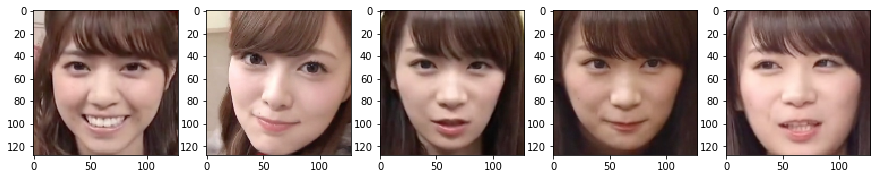

In [30]:
emb_vecs = np.zeros((len(files),1024))
plt.subplots_adjust(wspace=2, hspace=2)
plt.figure(figsize=(15,15))
for i,file in enumerate(files):
    file = np.array(Image.open('{}{}'.format(dir_path,file)).resize((imwidth,imhight)))
#     print(file[0])
    file01 = (file/255.).astype(np.float32)
    plt.subplot(1,len(files),i+1)
    plt.imshow(file/255.)
    file01 = (file/255.).astype(np.float32)
#     print(file[0])
    emb_vecs[i] = embNet.predict(np.expand_dims(file,axis=0))[0] # need [0] because of expanding dimension -> [[]]
plt.show()

In [27]:
# print(test_img[0])
# test_img = (test_img/255.).astype(np.float32)
# print(test_img[0])

# plt.imshow(test_img)

In [16]:
emb_vecs.shape

(5, 1024)

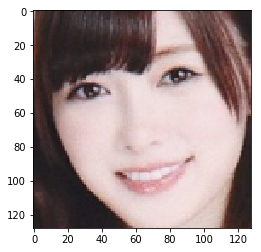

In [32]:
test_img = np.array(Image.open('./nogi_imgs/shiraishi/inputImage2_102.png').resize((imwidth,imhight)))
test_img = (test_img / 255.).astype(np.float32)
plt.imshow(test_img)
plt.show()
# print(test_img)
test_emb = embNet.predict(np.expand_dims(test_img, axis=0))[0]

In [18]:
test_emb.shape

(1024,)

## Retrieve the Nearest one(Calcurate L2 Norm same as Loss function)

In [19]:
import scipy.spatial.distance as dis
from keras import backend as K # calcurate by Keras (= training loss)

In [20]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Other Candidates For Calcurating Distance

In [21]:
#     similarities[i] = dis.cosine(test_emb,e)
#     similarities[i] = K.sum(K.square(np.expand_dims(test_emb,axis=0)-np.expand_dims(e,axis=0)), axis=-1)[0]
#     similarities[i] = np.linalg.norm(test_emb-e)

[   0.            0.           10.67910957 ...,  688.80206299    0.            0.        ]
[   0.            0.           15.58846951 ...,  820.75482178    0.            0.        ]
[   0.            0.            7.8541975  ...,  591.64056396    0.            0.        ]
[   0.            0.            6.49771833 ...,  550.60705566    0.            0.        ]
[   0.            0.            8.387743   ...,  774.65667725    0.            0.        ]


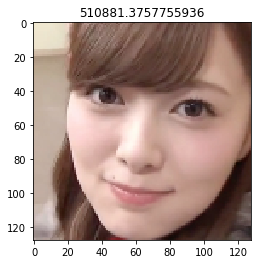

In [26]:
similarities = np.zeros(len(emb_vecs))
for i,emb_vec in enumerate(emb_vecs):
    print(emb_vec)
    similarities[i] = distance(test_emb,emb_vec)
#     similarities[i] = np.linalg.norm(test_emb-emb_vec)
min_idx = np.argmin(similarities)
nearest = np.array(Image.open('{}{}'.format(dir_path,files[min_idx])).resize((imwidth,imhight)))
plt.imshow(nearest)
plt.title('{}'.format(similarities[min_idx]))
plt.show()

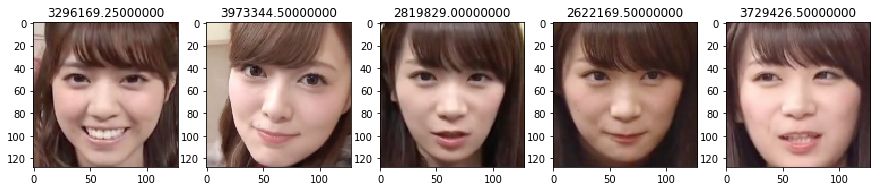

In [29]:
plt.subplots_adjust(wspace=2, hspace=2)
plt.figure(figsize=(15,15))
for i,file in enumerate(files):
    file = np.array(Image.open('{}{}'.format(dir_path,file)).resize((imwidth,imhight)))
    plt.subplot(1,len(files),i+1)
    plt.imshow(file)
    emb_vec = embNet.predict(np.expand_dims(file,axis=0))[0] # need [0] because of expanding dimension -> [[]]
    plt.title('{0:.8f}'.format(np.linalg.norm(test_emb-emb_vec), axis=-1))
plt.show()